# Census Income Project

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

* A single cell estimate of the population 16+ for each state.

* Controls for Hispanic Origin by age and sex.

* Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.model_selection import cross_val_score                 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# loading census data

In [2]:
df=pd.read_csv('Census Income')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset contains the details of the annual income of the persons.we need to predict whether the income of the person is over $50k per year or not. In the dataset "Income" is the target variable and it is a Classification problem

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


* Education_num seems to be the numeric code for Education, for instance Bachelors is 13, HS-grad is 9 and so on.



In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
18612,33,Private,163110,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,3781,0,40,United-States,<=50K


In [6]:
#To know the shape of census

In [7]:
df.shape

(32560, 15)

* we have total of 32560 rows and 15 columns which is fair enough data to workaround.

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

As we can that this dataset is a healthy mix of both categorical and integer type of datatypes.

* We have 9 object datatypes
* we have 6 integer datatypes

Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country are all categorical in nature, as is the case with the target variable Income.

While Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are continuous in nature.

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean age is 38 and mode is 37, the age range is 17 - 90 while IQR is 28 - 48.

Education number is just encoded data for education, most of the people have max education level of some college.

For both capital gain and capital loss we can see that most of the data is around 0.

For hours per week most of the data is centered towards 40 hours per week.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains 32560 rows and 15 columns.It contains both int and object type data.



# Checking and treating missing values


In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We do not have any null values in the dataset.



In [13]:
# check for the unique values in each attributes
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each columns.Income holds only 2 values.



In [14]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

As above, we can notice that the marital status attribute has different values which sounds similar that can be grouped to categories.



<AxesSubplot:>

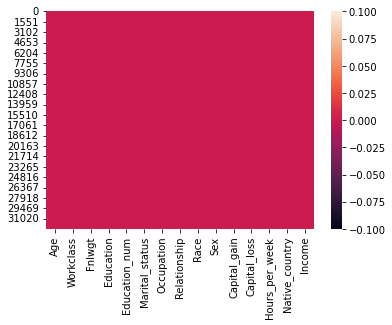

In [15]:
sns.heatmap(df.isna())

There is no null values in the dataset.



In [16]:
# Statistical Calculations
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


# Value Count Function


In [17]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We can observe that the the symbol '?' is present in 1836 rows in this attribute



In [18]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

We can observe that the the symbol '?' is present in 1843 rows in this attribute



In [19]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can observe that the the symbol '?' is present in 583 rows in this attribute



In [20]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [21]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [22]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [23]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Target variable has only two types which is a good sign.



So we have symbol '?' in three attibutes i.e. 'Workclass','Occupation', & 'Native_country' which I am replacing with modes of each attributes


In [24]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


These are the categorical columns present in the dataset.



In [25]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


These are the columns having numerical values.



# EDA and Data Visualisation


# Univariate Analysis


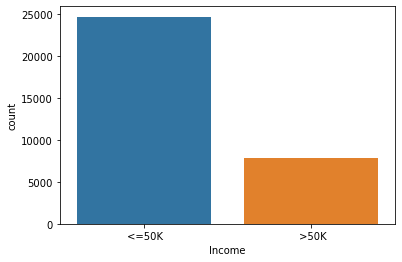

In [26]:
#Count plot for Income
sns.countplot(df['Income']);

Most of the people have the income less than or equal to 50K. We can also observe that data imbalance issue.



<AxesSubplot:xlabel='Workclass', ylabel='count'>

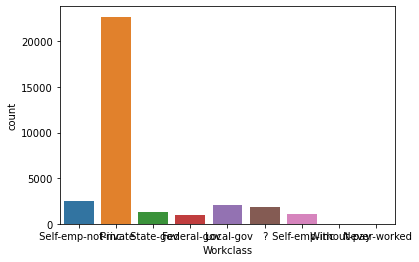

In [27]:
#Count plot for Workclass
sns.countplot(df['Workclass'])

The count of Private work class is high compare to others. This means the people working in private sectors are have high count and the people who never worked have least count.



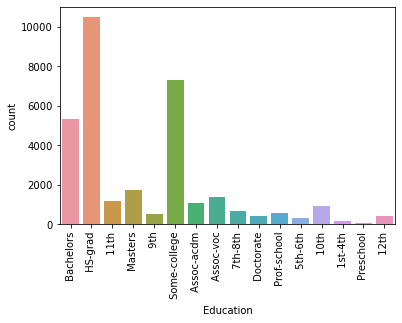

In [28]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

The count of High-School is high followed by Secondary-School. Most of the people have their High School graduation with count more than 10K and the count of PhD is very less compare to others.

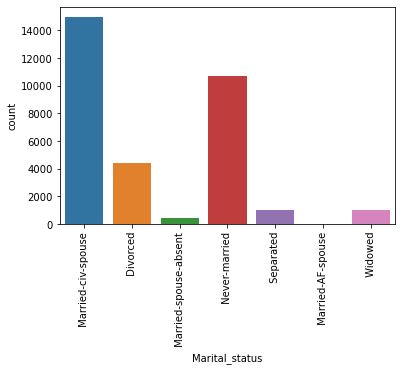

In [29]:
#Count plot for Marital_status
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()

The people who got married have high counts followed by the Singles or never married people.



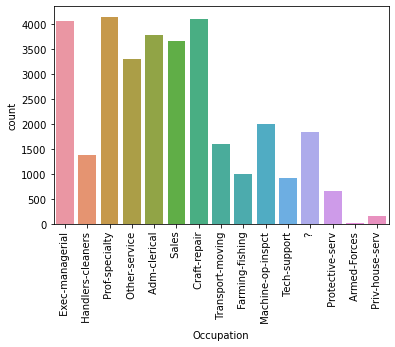

In [30]:
#count plot for Occupation
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.



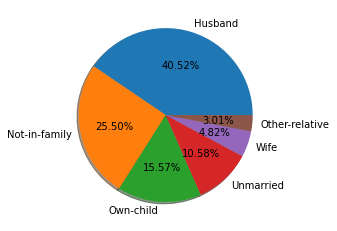

In [31]:
#Ploting pie chart for Relationship
df["Relationship"].value_counts()
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.



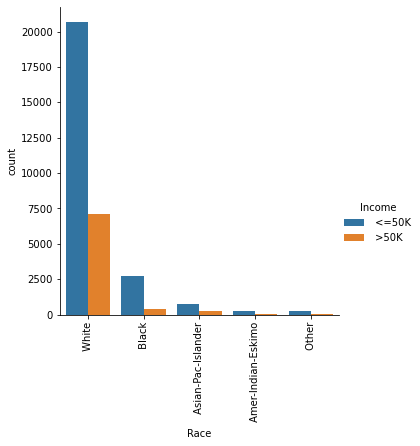

In [32]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

In US white people have more chance of getting job than any other raced people.



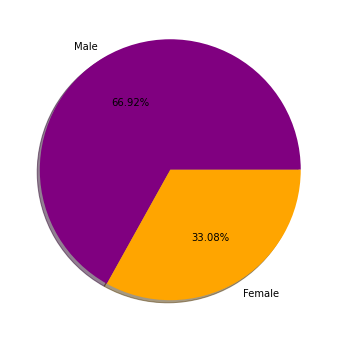

In [33]:
# Visualize the count of Sex group of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(8,6))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

The count of Male is high and has around 66% and only 33% of females are there.



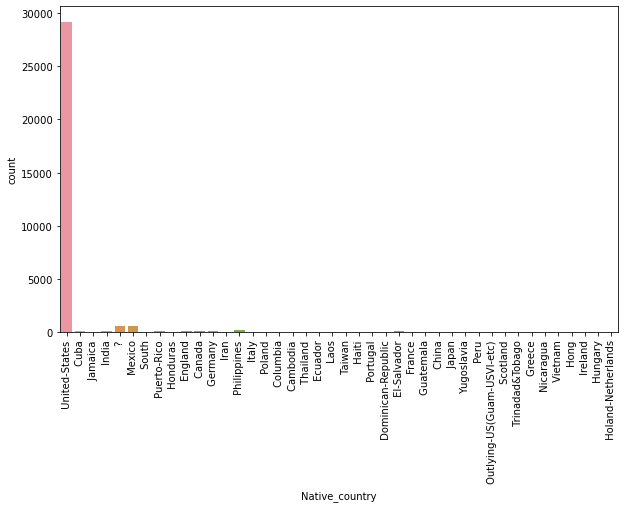

In [34]:
# Visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

The United States country has highest count of around 29K and other countries have very less counts.



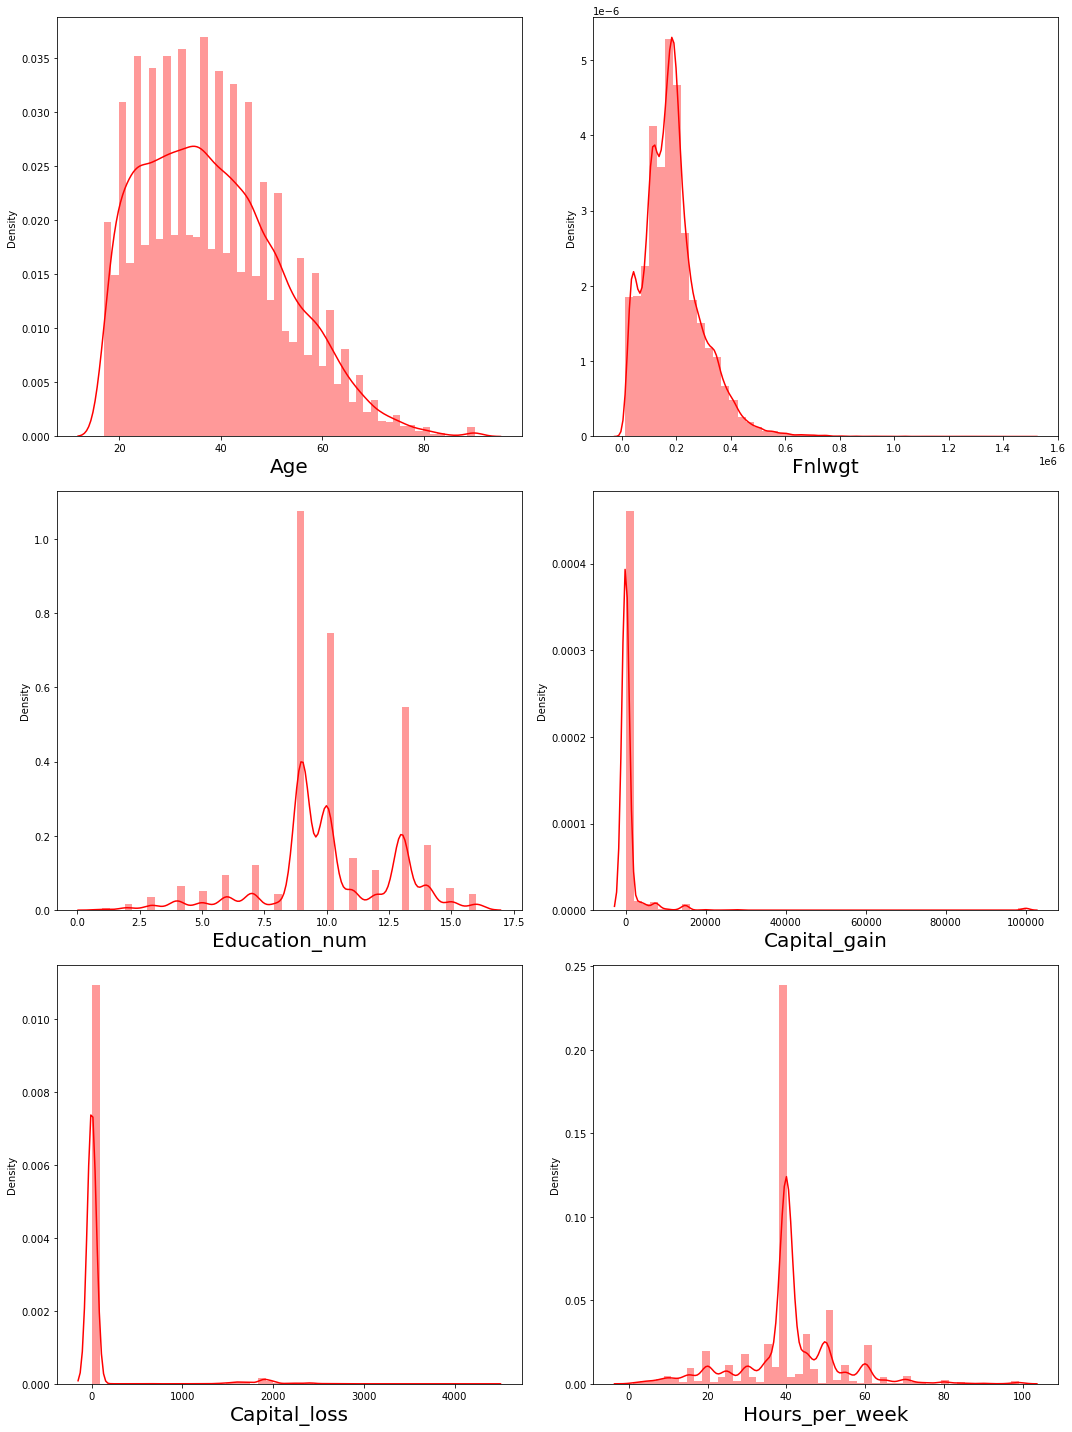

In [35]:
# Checking how the data has been distriubted in each numerical column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

All the numerical columns are skewed but skewness is less in Age column.



# Bivariate Analysis


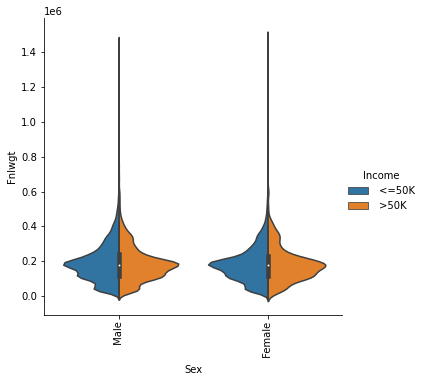

In [36]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.



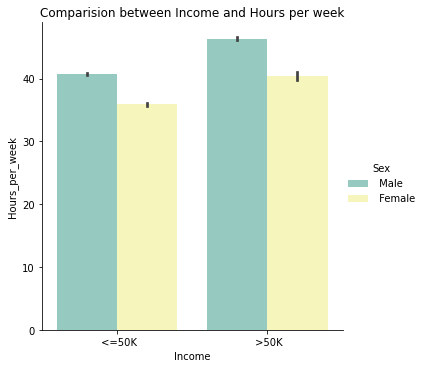

In [37]:
# Visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="Set3");
plt.title('Comparision between Income and Hours per week')
plt.show()

This shows how the income is related to the hours per week. The income is >50K when the Hours is high for both male and female.



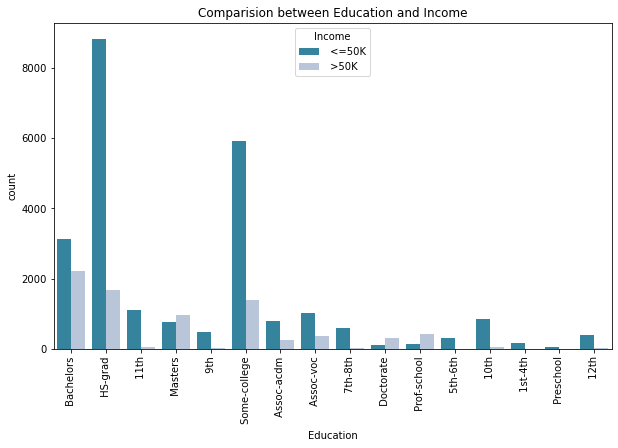

In [38]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"],palette="PuBuGn_r" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.

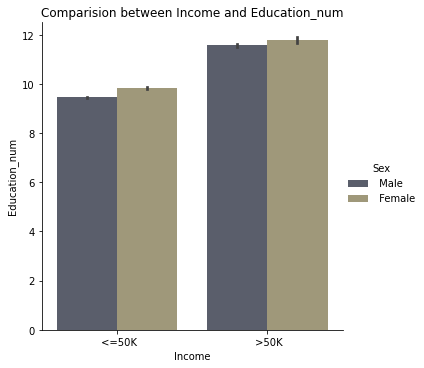

In [39]:
# Visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="cividis")
plt.title('Comparision between Income and Education_num')
plt.show()

The Income is more than 50K for the people having high education number. Here both gender have the income more than 50K.



<Figure size 720x432 with 0 Axes>

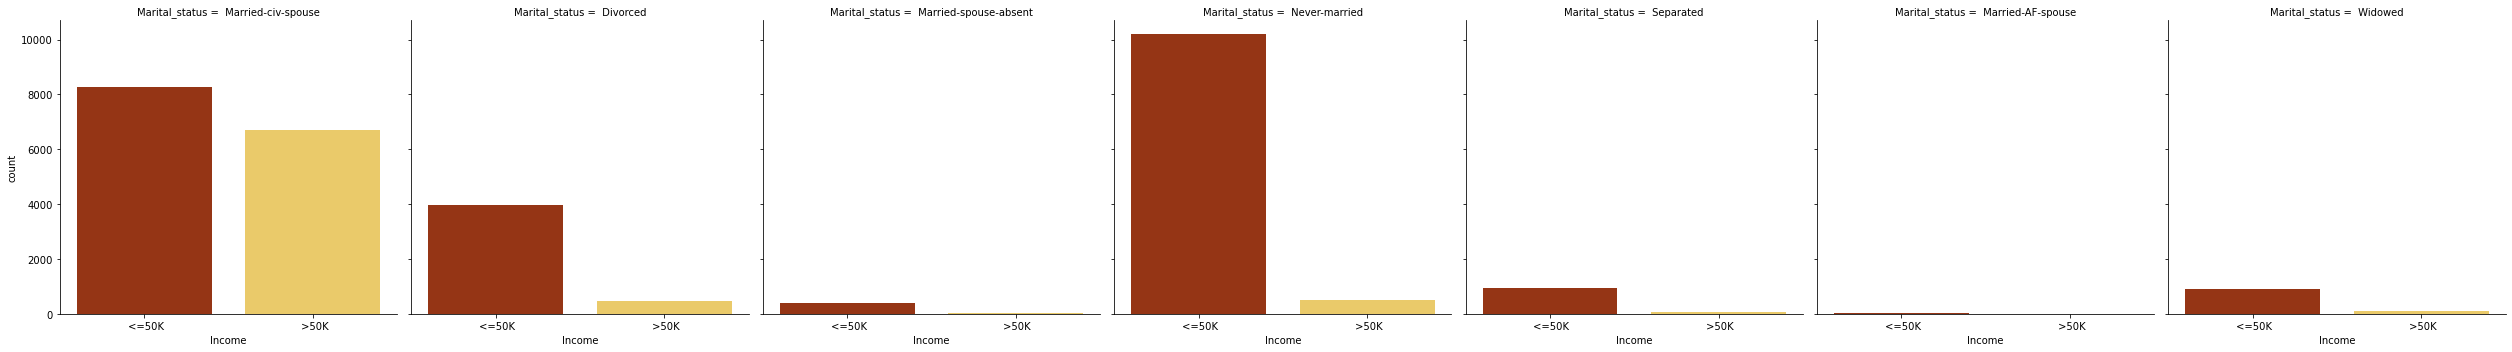

In [40]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="afmhot")
plt.show()

Married people getting income >50K compare to others. and more people who are Singles those getting <=50K.



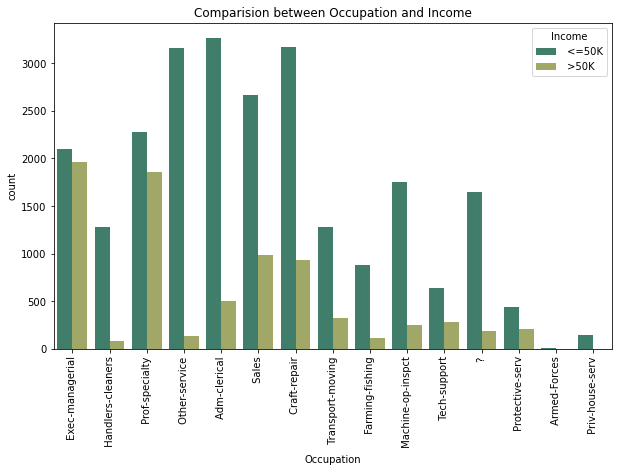

In [41]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="gist_earth" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

* The people in the position Prof-speciality and Exce-managerial have the income more than 50K.
* Also the people who are in the position Prof_Speciality, Other services, Adm-clerical and craft repair they have income less than 50K.

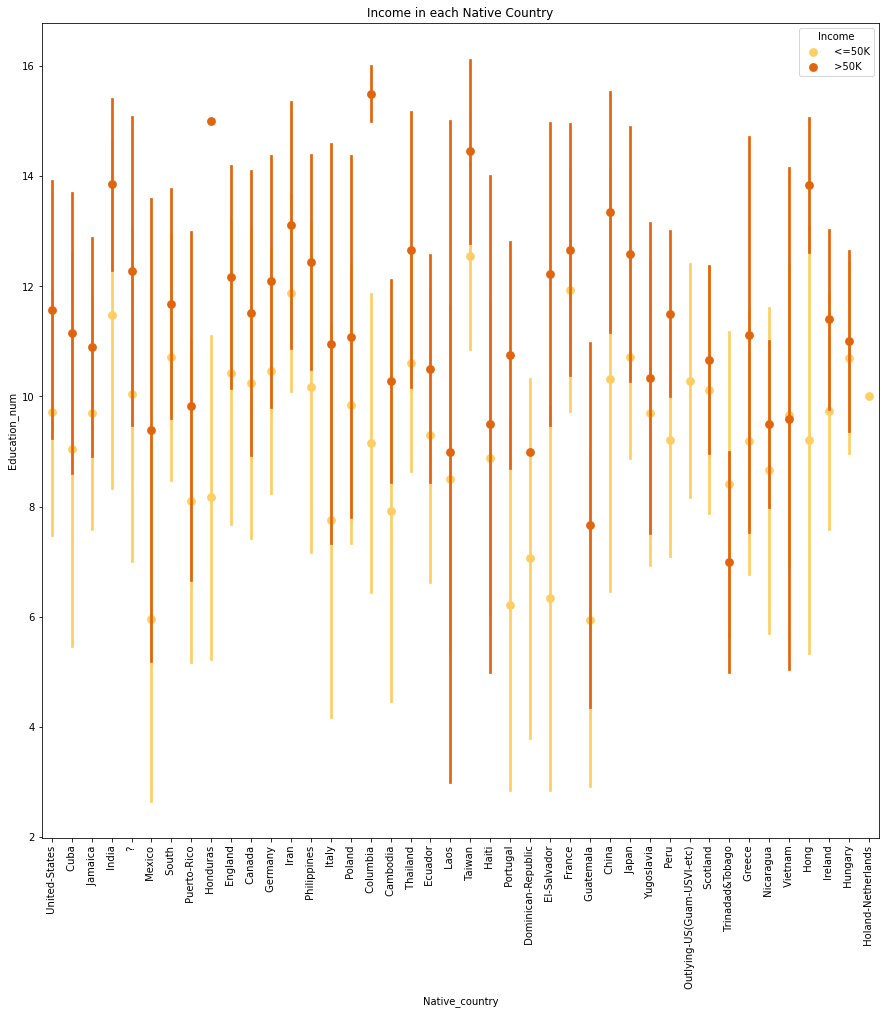

In [42]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="YlOrBr",ci="sd")
plt.xticks(rotation=90)
plt.show()

The countries having high education numbers have high income that is more than 50K.



# Multivariate Analysis


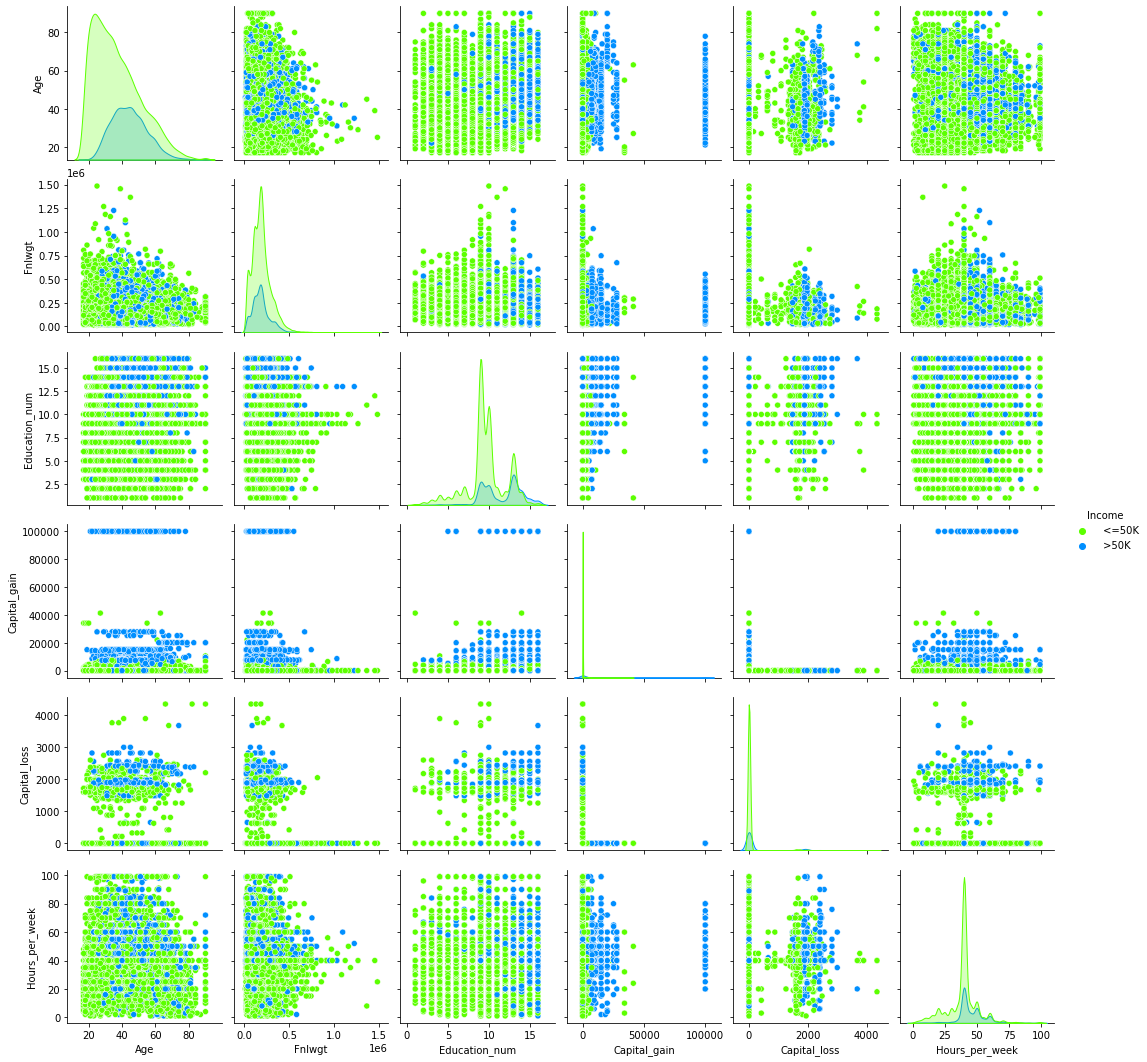

In [43]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="gist_rainbow")

Above are the pair plots of df.And there are some extreme outliers in the dataset.And some skewness also present.



# Checking Outliers


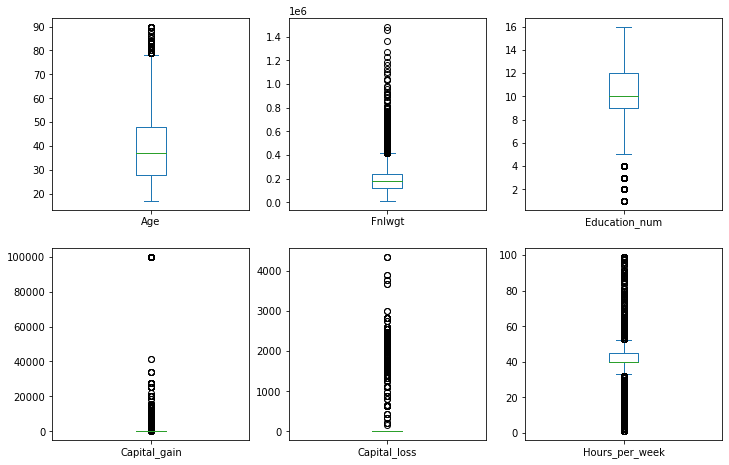

In [44]:
# Identifying the outliers using boxplot

df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

We can see outliers present more or less in all columns.



# Zscore Method

In [45]:
#Removing outliers
# Features containing outliers
features = df[["Age","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Education_num,Hours_per_week
0,0.837097,1.134779,2.222120
1,0.042640,0.420027,0.035430
2,1.057031,1.197429,0.035430
3,0.775755,1.134779,0.035430
4,0.115952,1.523480,0.035430
...,...,...,...
32555,0.849066,0.746077,0.197407
32556,0.103982,0.420027,0.035430
32557,1.423589,0.420027,0.035430
32558,1.215624,0.420027,1.655200


In [46]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
# Shape of original dataset
df.shape

(32560, 15)

Before removing the outliers we had 32560 rows and 15 columns in our dataset.



In [48]:
# Shape of new dataset
df_new.shape

(31794, 15)

After removing the outliers we have 31794 rows and 15 columns.



In [49]:
# Checking the percentage data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

2.3525798525798525

Here we are losing only 2% data by zscore method.



In [50]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Label Encoder


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Workclass'] = le.fit_transform(df_new['Workclass'])
df_new['Marital_status'] = le.fit_transform(df_new['Marital_status'])
df_new['Occupation'] = le.fit_transform(df_new['Occupation'])
df_new['Relationship'] = le.fit_transform(df_new['Relationship'])
df_new['Race'] = le.fit_transform(df_new['Race'])
df_new['Sex'] = le.fit_transform(df_new['Sex'])
df_new['Native_country'] = le.fit_transform(df_new['Native_country'])
df_new['Income'] = le.fit_transform(df_new['Income']) 

In [52]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,8,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,10,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,8,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,11,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,6,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,10,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,10,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,10,9,4,1,3,4,1,0,0,20,39,0


In [53]:
## Statistical summary of data
df_new.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,31794.000000,31794.000000,3.179400e+04,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000,31794.000000
mean,38.304145,3.869944,1.896862e+05,9.169277,10.135906,2.607945,6.575203,1.454614,3.665912,0.667201,1074.600931,87.085016,40.089482,36.785148,0.241744
std,13.316101,1.446247,1.053360e+05,3.369333,2.479442,1.504332,4.231813,1.609613,0.848127,0.471223,7373.524486,401.360502,11.164247,7.747297,0.428147
min,17.000000,0.000000,1.228500e+04,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178490e+05,8.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783840e+05,10.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,4.000000,2.367222e+05,11.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,79.000000,8.000000,1.484705e+06,13.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,77.000000,41.000000,1.000000


# Skewness


In [54]:
df_new.skew()

Age                0.475041
Workclass         -0.740714
Fnlwgt             1.457739
Education         -1.082013
Education_num     -0.161158
Marital_status    -0.027131
Occupation         0.116159
Relationship       0.776451
Race              -2.432671
Sex               -0.709694
Capital_gain      11.984875
Capital_loss       4.565730
Hours_per_week    -0.342396
Native_country    -3.726631
Income             1.206468
dtype: float64

From the above we can see high skewness is observed in fnlwgt,capital-gain,capital-loss as fnlwgt is not an important feature we will drop that, and for other we will normalize data after spliting.

<AxesSubplot:xlabel='Age', ylabel='Density'>

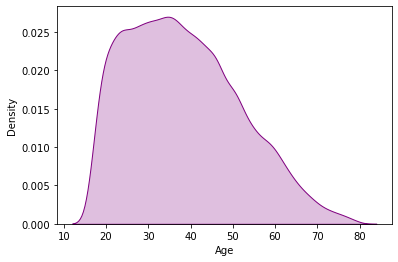

In [55]:
sns.distplot(df_new["Age"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

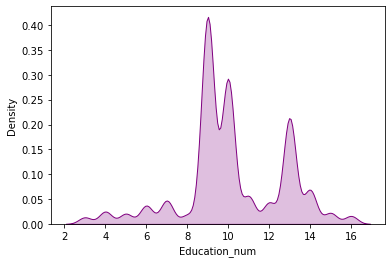

In [56]:
sns.distplot(df_new["Education_num"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

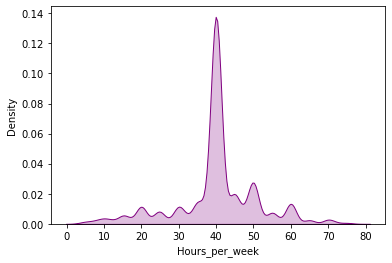

In [57]:
sns.distplot(df_new["Hours_per_week"],color="purple",kde_kws={"shade": True},hist=False)

Obervation- We can see there is no skewness.



# Correlation


In [58]:
df_new.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.013577,-0.075628,0.000275,0.054480,-0.286665,-0.013892,-0.268306,0.030729,0.091481,0.081150,0.057810,0.097666,0.000504,0.248695
Workclass,0.013577,1.000000,-0.016217,0.022798,0.052541,-0.063556,0.248531,-0.090881,0.048735,0.095577,0.032722,0.010978,0.128796,-0.006803,0.051843
Fnlwgt,-0.075628,-0.016217,1.000000,-0.025098,-0.035836,0.027569,0.001840,0.009453,-0.023558,0.026633,-0.001195,-0.011598,-0.014729,-0.048163,-0.008237
Education,0.000275,0.022798,-0.025098,1.000000,0.357128,-0.039138,-0.022249,-0.014677,0.015201,-0.025930,0.027891,0.016257,0.061631,0.057146,0.077620
Education_num,0.054480,0.052541,-0.035836,0.357128,1.000000,-0.065640,0.113099,-0.102341,0.030088,0.016180,0.124342,0.081976,0.160851,0.023105,0.338172
Marital_status,-0.286665,-0.063556,0.027569,-0.039138,-0.065640,1.000000,-0.008736,0.185258,-0.067879,-0.126472,-0.042781,-0.036504,-0.196746,-0.021478,-0.198596
Occupation,-0.013892,0.248531,0.001840,-0.022249,0.113099,-0.008736,1.000000,-0.076140,0.006571,0.081061,0.024087,0.017672,0.071946,-0.012507,0.075047
Relationship,-0.268306,-0.090881,0.009453,-0.014677,-0.102341,0.185258,-0.076140,1.000000,-0.115618,-0.582956,-0.058620,-0.060565,-0.262619,-0.005356,-0.252174
Race,0.030729,0.048735,-0.023558,0.015201,0.030088,-0.067879,0.006571,-0.115618,1.000000,0.087595,0.010382,0.018096,0.044611,0.140027,0.072830
Sex,0.091481,0.095577,0.026633,-0.025930,0.016180,-0.126472,0.081061,-0.582956,0.087595,1.000000,0.047778,0.046220,0.238230,-0.009386,0.216842


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.



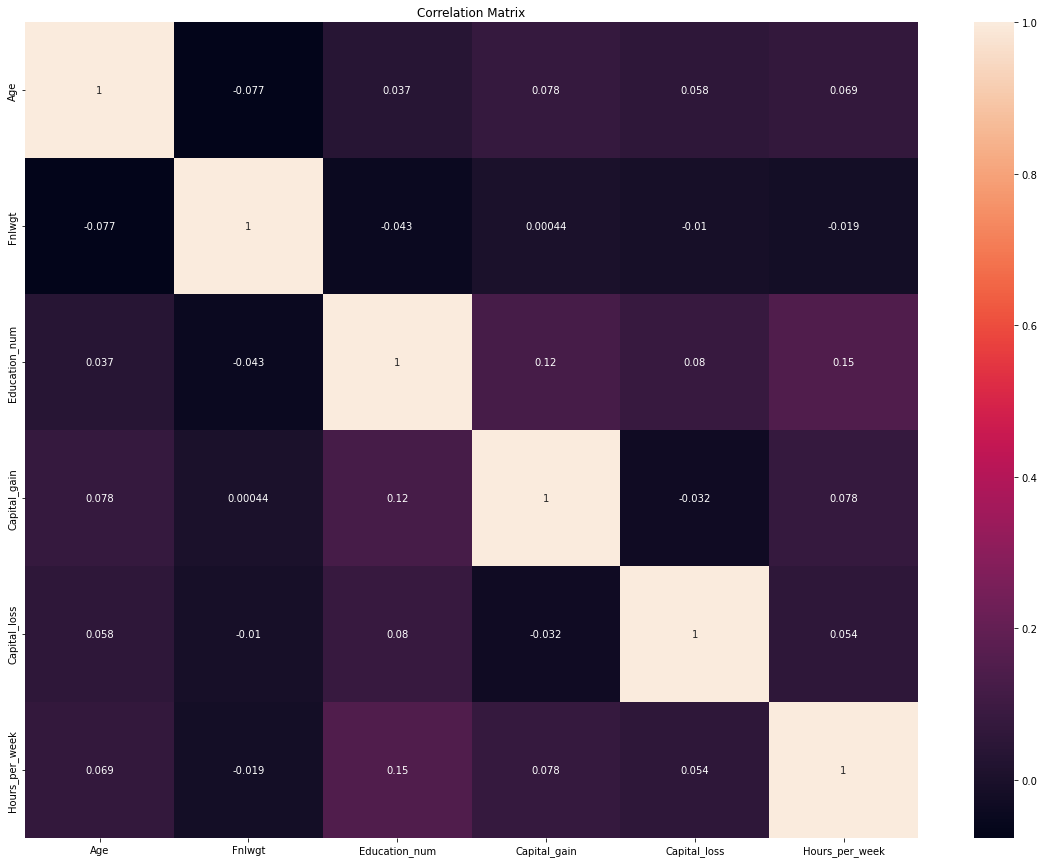

In [59]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Education seems to be most correlated with Income (0.34), apart from that Age, Hours_per_week and Capital_gain are also very much correlated with Income at 0.23, 0.23 and 0.22 respectively.

Final Weight seems to be least correlated with Income at -0.01.

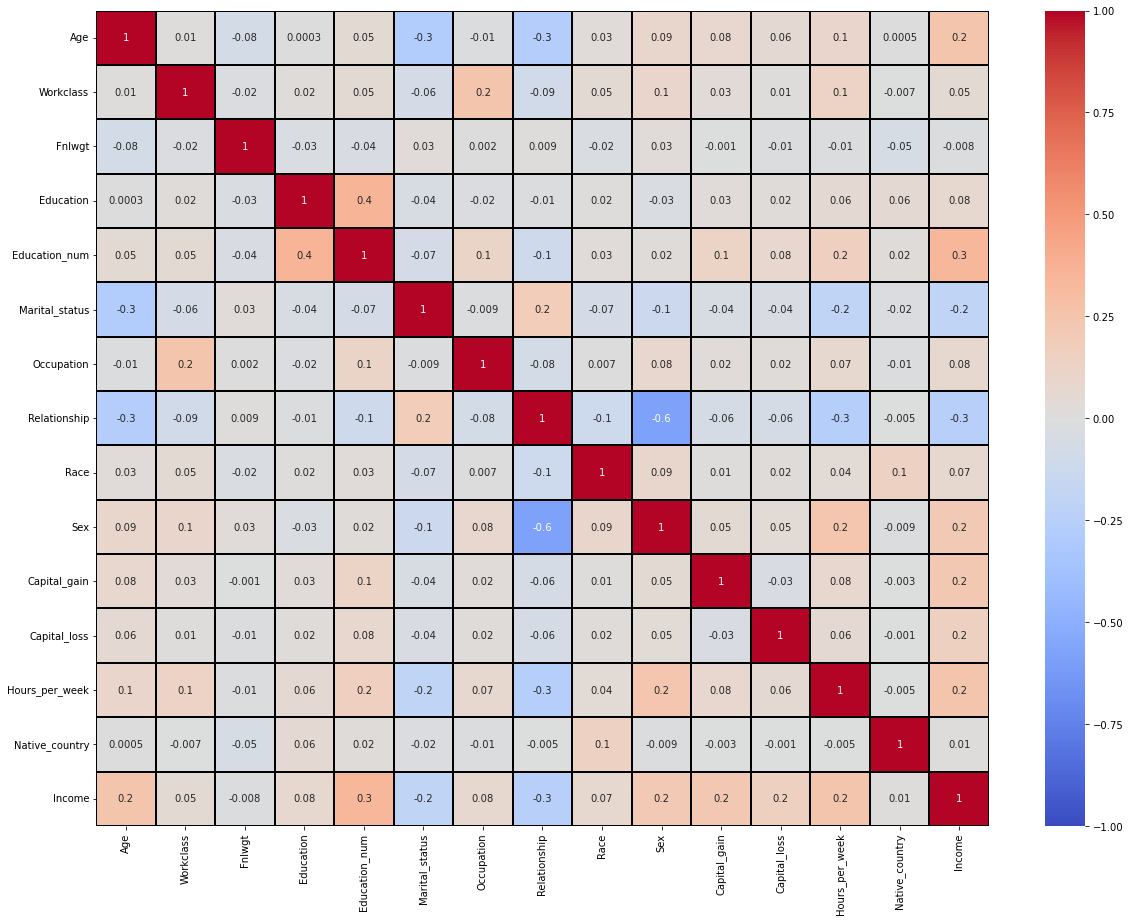

In [60]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

* There is no multicolinearity issue.
* Workclass and Fnlwgt has very less correlation with target.
* Native_country, Occupation, Race and Education has less correlation with target column.
* The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

# Visualizing the correlation between label and features using bar plot


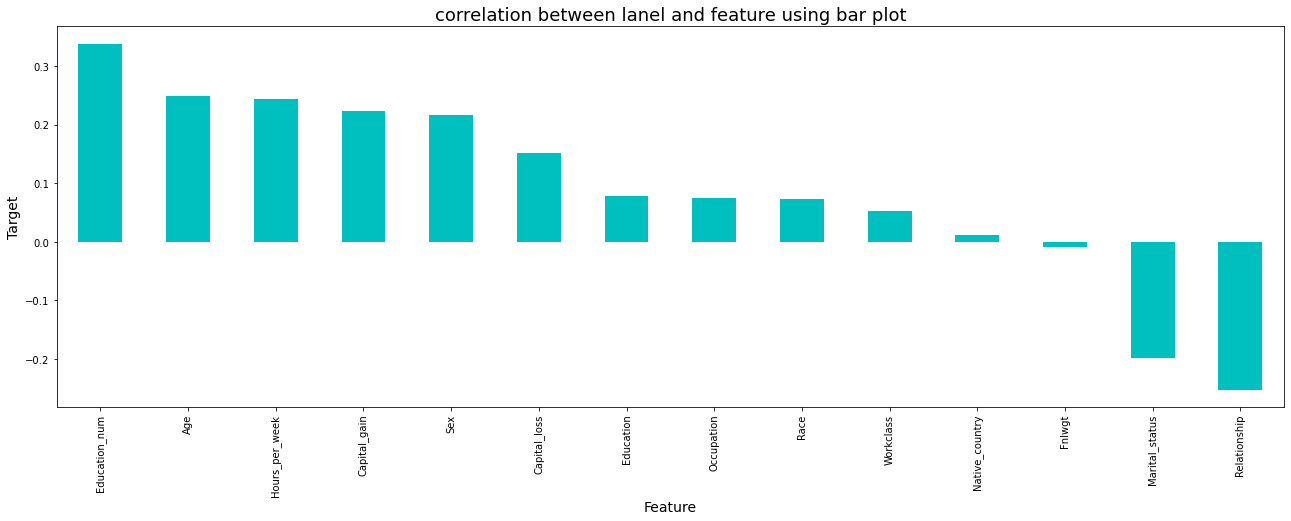

In [61]:
plt.figure(figsize=(22,7))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The column Fnlwgt has very less correlation with the label so we can drop it if necessary.



In [62]:
print(df["Workclass"].unique())
print(df["Education"].unique())
print(df["Marital_status"].unique())
print(df["Occupation"].unique())
print(df["Relationship"].unique())
print(df["Race"].unique())
print(df["Sex"].unique())
print(df["Native_country"].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany'

As we have many unique values of native.country column so we will store its count in a dictonary and then map it on the dataset



In [63]:
x=df.iloc[:,:-1]
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [64]:
y=df['Age']
y.head()

0    50
1    38
2    53
3    28
4    37
Name: Age, dtype: int64

# Separating the features and label variables into x and y



In [65]:
x = df_new.drop("Income", axis=1)
y = df_new["Income"]

In [66]:
# Dimension of x
x.shape

(31794, 14)

In [67]:
# Dimension of y
y.shape

(31794,)

# Scaling the data using standard scaler


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.878338,1.472839,-1.009882,-0.347041,1.155154,-0.404136,-0.608544,-0.903719,0.393919,0.706256,-0.145740,-0.216978,-2.426488,0.285892
1,-0.022841,0.089928,0.246451,0.246558,-0.458137,-1.733650,-0.135926,-0.282441,0.393919,0.706256,-0.145740,-0.216978,-0.008015,0.285892
2,1.103633,0.089928,0.427541,-2.424636,-1.264783,-0.404136,-0.135926,-0.903719,-1.964256,0.706256,-0.145740,-0.216978,-0.008015,0.285892
3,-0.773823,0.089928,1.411911,-0.347041,1.155154,-0.404136,0.809311,2.202667,-1.964256,-1.415917,-0.145740,-0.216978,-0.008015,-4.102805
4,-0.097939,0.089928,0.900900,0.543357,1.558477,-0.404136,-0.608544,2.202667,0.393919,-1.415917,-0.145740,-0.216978,-0.008015,0.285892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31789,-0.848921,0.089928,0.641916,-0.940639,0.751832,-0.404136,1.518238,2.202667,0.393919,-1.415917,-0.145740,-0.216978,-0.187161,0.285892
31790,0.127356,0.089928,-0.335240,0.246558,-0.458137,-0.404136,0.100383,-0.903719,0.393919,0.706256,-0.145740,-0.216978,-0.008015,0.285892
31791,1.479124,0.089928,-0.358632,0.246558,-0.458137,2.254893,-1.317471,1.581390,0.393919,-1.415917,-0.145740,-0.216978,-0.008015,0.285892
31792,-1.224413,0.089928,0.112060,0.246558,-0.458137,0.925379,-1.317471,0.960113,0.393919,0.706256,-0.145740,-0.216978,-1.799476,0.285892


In [69]:
y.value_counts()

0    24108
1     7686
Name: Income, dtype: int64

Here we can notice the class imbalancing issue so lets use SMOTE to balance the data.



# Balancing the target variable using oversampling:


# Smote

In [70]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

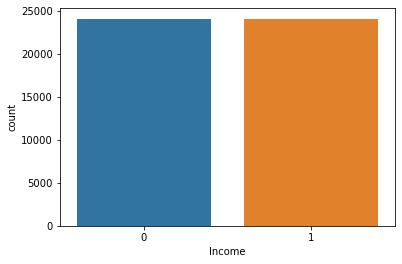

In [71]:
y.value_counts()
sns.countplot(y)

# Now the data is balanced.



In [72]:
# DataFrame after preprocessing and data cleaning
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,8,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,10,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,8,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,11,14,2,4,5,4,0,0,0,40,39,0


# Finding the Best Random State and Accuracy


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8593155893536122  on Random_state  23


# Creating train_test split


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithms


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier


In [76]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8575181472519876
[[6246 1076]
 [ 985 6158]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7322
           1       0.85      0.86      0.86      7143

    accuracy                           0.86     14465
   macro avg       0.86      0.86      0.86     14465
weighted avg       0.86      0.86      0.86     14465



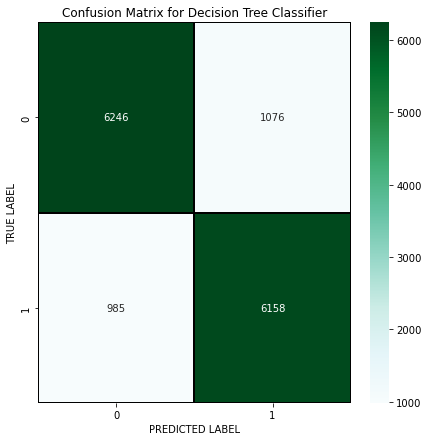

In [77]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier


In [78]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9021776702385067
[[6490  832]
 [ 583 6560]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7322
           1       0.89      0.92      0.90      7143

    accuracy                           0.90     14465
   macro avg       0.90      0.90      0.90     14465
weighted avg       0.90      0.90      0.90     14465



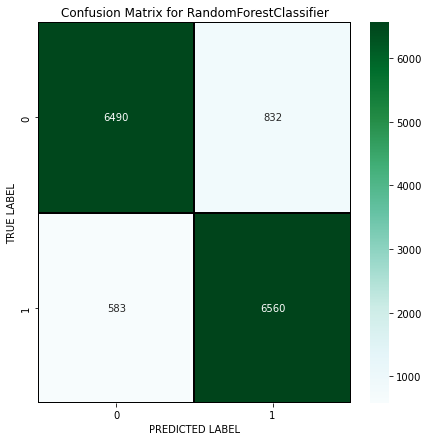

In [79]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression


In [80]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7768406498444521
[[5643 1679]
 [1549 5594]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      7322
           1       0.77      0.78      0.78      7143

    accuracy                           0.78     14465
   macro avg       0.78      0.78      0.78     14465
weighted avg       0.78      0.78      0.78     14465



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

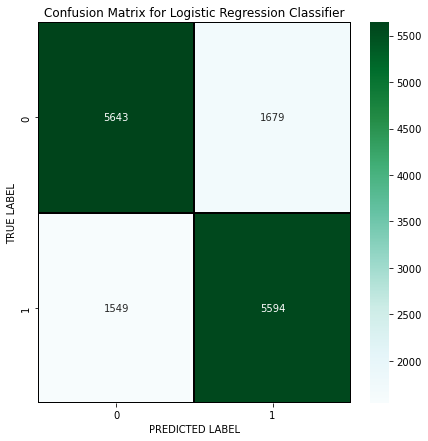

In [81]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

# KNeighbors Classifier


In [82]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8575872796405116
[[5716 1606]
 [ 454 6689]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      7322
           1       0.81      0.94      0.87      7143

    accuracy                           0.86     14465
   macro avg       0.87      0.86      0.86     14465
weighted avg       0.87      0.86      0.86     14465



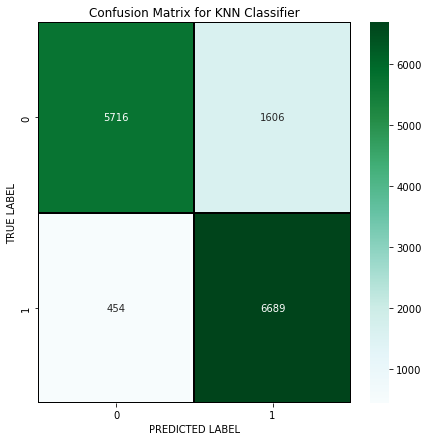

In [83]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier


In [84]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8683719322502592
[[6184 1138]
 [ 766 6377]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7322
           1       0.85      0.89      0.87      7143

    accuracy                           0.87     14465
   macro avg       0.87      0.87      0.87     14465
weighted avg       0.87      0.87      0.87     14465



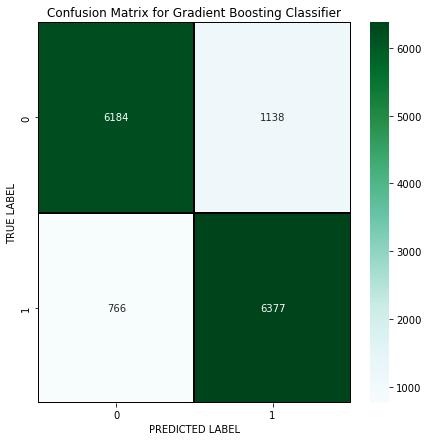

In [85]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Checking the Cross Validation Score


In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.851254200507689


In [88]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8992256704112854


In [89]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7733740964717477


In [90]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8609386044028129


In [91]:
# cv score for  ExtraTreesClassifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.860607247805125


From the difference between the accuracy score and the CV score we can conclude that Random Forest Classifier is our best fitting model.



# ROC-AUC curve


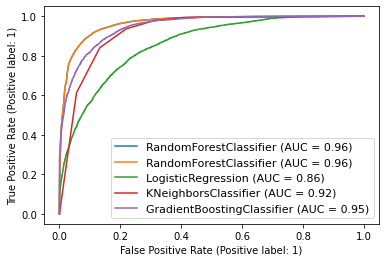

In [92]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

The AUC for best model is 0.96 which is really good.



# Saving The Model


In [94]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=400)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

89.81679917041133


In [95]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

In [96]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Census_Income_Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 0, 1])

In [97]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
14460,0,0
14461,1,1
14462,0,0
14463,0,0




The predicted and actual values are same.
Hence predicted the "Income" using the final Model.



# Thank You